In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def datagen(spec_type):
  base_dir = '/content/drive/MyDrive/Colab Notebooks/spectograms/preprocessed/' + spec_type

  train_dir = base_dir + 'train/'
  val_dir = base_dir + 'val/'
  test_dir = base_dir + 'test/'

  train_datagen = ImageDataGenerator()
  val_datagen = ImageDataGenerator()
  test_datagen = ImageDataGenerator()
  train_datagen = train_datagen.flow_from_directory(train_dir, target_size = (100,100), batch_size=128, color_mode='grayscale')
  val_datagen = val_datagen.flow_from_directory(val_dir, target_size = (100,100), batch_size=128, color_mode='grayscale')
  test_datagen = test_datagen.flow_from_directory(test_dir, target_size = (100,100), batch_size=128, color_mode='grayscale')

  return train_datagen, val_datagen, test_datagen

In [4]:
train, val, test = datagen('noiseless/')

Found 5772 images belonging to 10 classes.
Found 1480 images belonging to 10 classes.
Found 1480 images belonging to 10 classes.


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers, activations
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize) #Numpy array kisaltmasini engeller

In [5]:
def add_layers(mdl):  
  mdl.add(layers.Conv2D(32, activation = 'relu', kernel_size = (3,3),strides=(1,1), padding='same', input_shape = (100,100,1)))
  mdl.add(layers.MaxPooling2D(2,2))
  
  mdl.add(layers.Conv2D(64, activation = 'elu', kernel_size = (3,3),strides=(1,1), padding='same'))
  mdl.add(layers.MaxPooling2D(2,2))
  
  mdl.add(layers.Conv2D(64, activation = 'elu', kernel_size = (3,3),strides=(1,1), padding='same'))
  mdl.add(layers.MaxPooling2D(2,2))
  
  mdl.add(layers.Conv2D(64, activation = 'elu', kernel_size = (3,3),strides=(1,1), padding='same'))
  mdl.add(layers.Flatten())

  mdl.add(layers.Dense(64, activation="relu"))
  mdl.add(tf.keras.layers.Dropout(0.5))
  mdl.add(layers.Dense(64, activation="relu"))
  mdl.add(tf.keras.layers.Dropout(0.5))    
  mdl.add(layers.Dense(64, activation="relu"))
  mdl.add(tf.keras.layers.Dropout(0.5))          
  mdl.add(layers.Dense(64, activation="relu"))
  mdl.add(tf.keras.layers.Dropout(0.5))          
  mdl.add(layers.Dense(10, activation="softmax"))

  mdl.summary()

In [6]:
model = Sequential()
add_layers(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [7]:
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics = ["accuracy"], run_eagerly=True)

results = model.fit(train, epochs= 5, verbose = 1, validation_data = val)


Epoch 1/5
46/46 [==============================] - 81s 2s/step - loss: 2.2886 - accuracy: 0.1097 - val_loss: 2.2724 - val_accuracy: 0.1304
Epoch 2/5
46/46 [==============================] - 84s 2s/step - loss: 2.2632 - accuracy: 0.1178 - val_loss: 2.2475 - val_accuracy: 0.1257
Epoch 3/5
46/46 [==============================] - 81s 2s/step - loss: 2.2449 - accuracy: 0.1289 - val_loss: 2.2161 - val_accuracy: 0.1203
Epoch 4/5
46/46 [==============================] - 83s 2s/step - loss: 2.2346 - accuracy: 0.1369 - val_loss: 2.2086 - val_accuracy: 0.1547
Epoch 5/5
46/46 [==============================] - 85s 2s/step - loss: 2.2242 - accuracy: 0.1272 - val_loss: 2.2192 - val_accuracy: 0.1466


In [12]:
model.evaluate(test)

12/12 [==============================] - 6s 516ms/step - loss: 2.2249 - accuracy: 0.1378


[2.224907398223877, 0.13783784210681915]

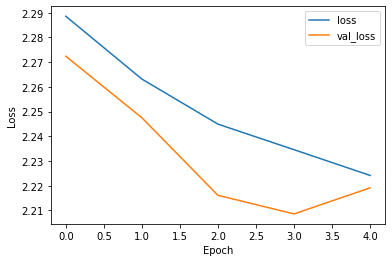

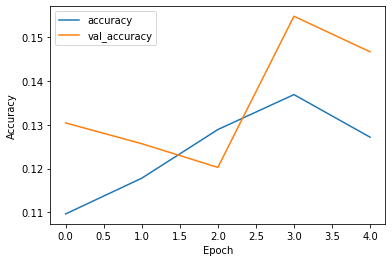

In [11]:
import matplotlib.pyplot as plt

def plot_graph(x : str):
  val_x = 'val_' + x
  plt.plot(results.history[x], label=x)
  plt.plot(results.history[val_x], label=val_x)
  plt.xlabel("Epoch")
  plt.ylabel(x.title())
  plt.legend()
  plt.show()

plot_graph('loss')
plot_graph('accuracy')